# 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing files

In [2]:
# defining path
path = r'C:\Users\hiron\Documents\050924_Instakart Basket analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [4]:
ords_prods_merge.shape

(32404859, 24)

# 03. Sampling data and creating exploratory charts

In [5]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.8

In [6]:
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [7]:
small.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,number_of_orders,weekday,order_hour_of_day,...,frequency_flag,First Name,last name,Gender,state,Age,joining date,number of dependents,family status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,Regular customer,NaN,Parks,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171
12,1,Chocolate Sandwich Cookies,61,19,5.8,1727826,1480,38,4,13,...,Frequent customer,Randy,Franklin,Male,Alabama,19,12/28/2019,1,living with parents and siblings,32283
13,1,Chocolate Sandwich Cookies,61,19,5.8,2694698,1480,39,2,12,...,Frequent customer,Randy,Franklin,Male,Alabama,19,12/28/2019,1,living with parents and siblings,32283


<Axes: xlabel='weekday'>

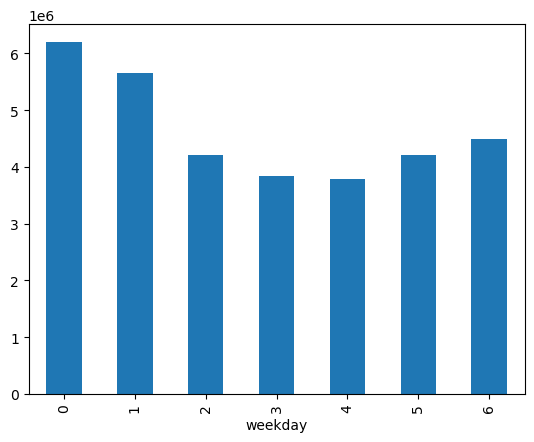

In [8]:
ords_prods_merge['weekday'].value_counts().sort_index().plot.bar()

<Axes: xlabel='weekday'>

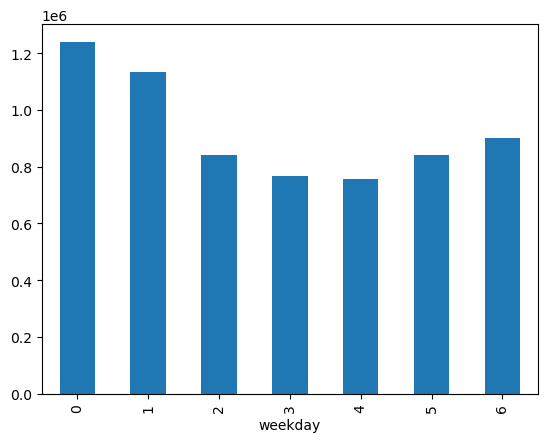

In [9]:
small['weekday'].value_counts().sort_index().plot.bar()

In [10]:
# Looks like a good sample

In [11]:
# Looking to plot income distribution

<Axes: ylabel='Frequency'>

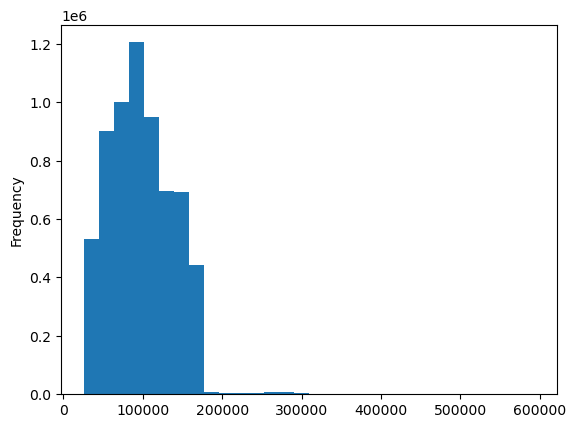

In [12]:
small['income'].plot.hist(bins = 30)

# 04. Creating histogram for hour of the day

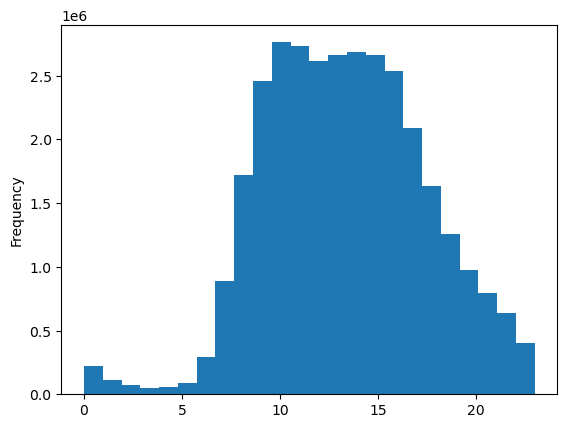

In [13]:
hist = ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24)

In [14]:
# The histogram shows the number of orders recieved in each hour of the day

In [15]:
# The busiest times are between 9 am and 4 pm

# 05. Bar chart from loyalty flag column

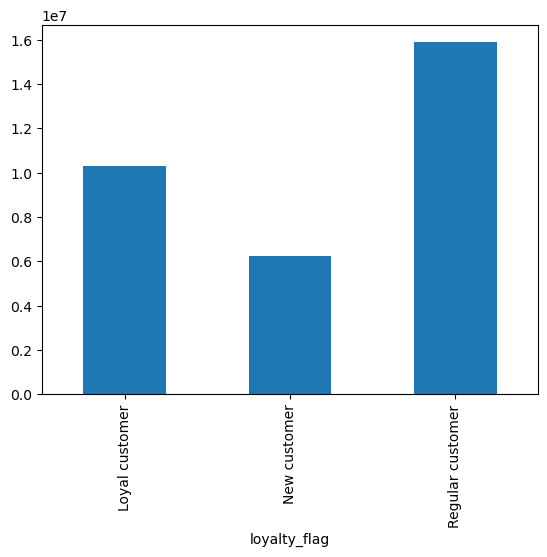

In [16]:
#creating a bar chart for "loyalty_flag"
bar = ords_prods_merge['loyalty_flag'].value_counts().sort_index().plot.bar()

# 06. Difference in expenditure depending on hour of the day

In [17]:
# We will use the sample that we created above and first group it by hour of the day, the plot a line chart with hour on x and prices in y

In [22]:
#group by hour of the day and calculate the mean expenditure
hourly_expenditure = small.groupby('order_hour_of_day')['prices'].mean().reset_index()

In [23]:
hourly_expenditure

,order_hour_of_day,prices
0,0,9.815733
1,1,11.678210
2,2,17.102889
3,3,10.723268
4,4,14.880125
5,5,15.120642
6,6,12.262748
7,7,11.795664
8,8,13.600451
9,9,11.290038


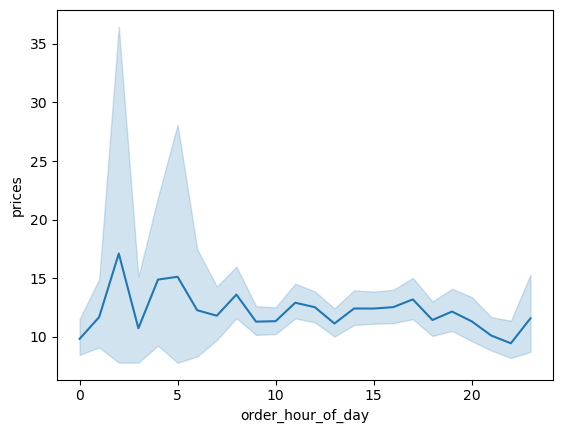

In [34]:
#Line chart
line_hourly_exp = sns.lineplot(data = small, x = 'order_hour_of_day', y = 'prices')

In [26]:
#plotting sum
#group by hour of the day and calculate the mean expenditure
hourly_expenditure2 = small.groupby('order_hour_of_day')['prices'].sum().reset_index()

In [27]:
df = pd.DataFrame(hourly_expenditure2)

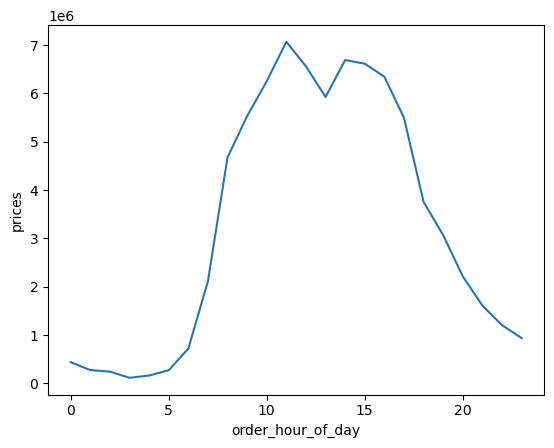

In [35]:
#Line chart
line_hourly_exp2 = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'prices')

In [29]:
# Relays totally different meanings between mean and sum

# 07. Ascertaining connections between age and number of dependents

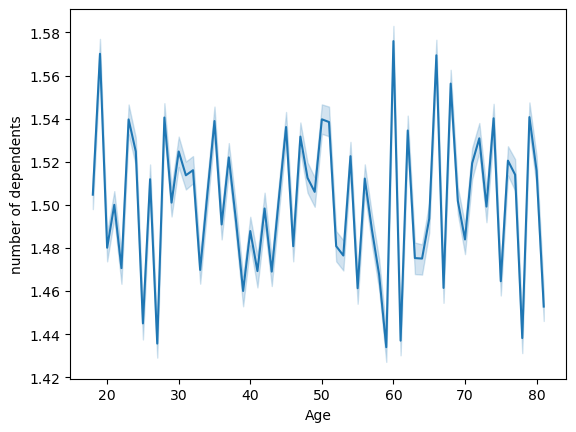

In [30]:
line_age_nod = sns.lineplot(data = small, x = 'Age', y = 'number of dependents')

### No corelation between age and number of dependents was observed

# 08. Ascertaining connection between age and spending power (income) using scatterplot

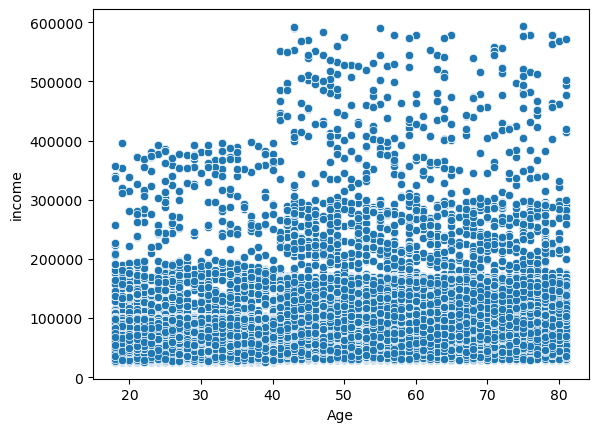

In [31]:
scatter = sns.scatterplot(x='Age', y='income', data=small)

### No clear linear coreleation , but we see a steep increase in income at age 40

# 09. Exporting image files

In [32]:
# histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hod.png'))

In [33]:
# bar
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [36]:
#line1
line_hourly_exp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hourly_exp_mean.png'))

In [37]:
#line1
line_hourly_exp2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hourly_exp_sum.png'))

In [38]:
#line_age_nod
line_age_nod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_nod.png'))

In [39]:
# scatter_age_income
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))